## Dataset Compilation

The dataset consists of 3097 x-ray images, which were obtained from different sources:
* Chest: 1327 images obtained from https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset    [

* Knee: 812 images obtained from https://www.kaggle.com/datasets/sohaibanwaar1203/kneemridataset . The original dataset contains different levels of lesions as labelled by two experts. Images were chosen from the "normal" ones of one expert plus the "doubtful" ones of the other expert.

* Hand: 958 images obtained from [the bone-age dataset] https://www.kaggle.com/kmader/rsna-bone-age   . Samples were chosen at random from the training side of the "normal" images.

In [5]:
## Importing the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import os
import random
import cv2
import csv
from skimage import feature
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Invalid file .DS_Store skipped.
Invalid file .DS_Store skipped.
Invalid file .DS_Store skipped.
Invalid file .DS_Store skipped.
Invalid file 0 copy 3.jpg skipped.
Invalid file 2 copy 4.jpg skipped.
Invalid file 26 copy 3.jpg skipped.

Calculating class distribution...
           Class  Number of Samples
0        Cardiac                516
1     chest_xray                624
2       fracture                514
3  Total Samples               1654
Total images: 1654
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [ 44  47  47 ...  28  30  29]
 [ 16  16  16 ...  15  15  15]
 [ 38  37  37 ... 106  94  47]]


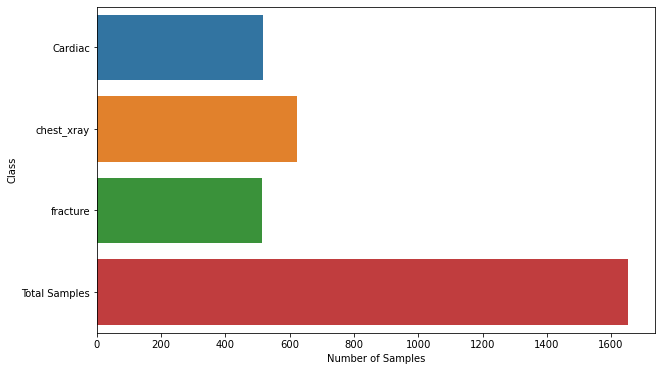

In [6]:
resize_width = 100
resize_height = 100
path = 'data'
images = [] # List to append the images as 2D numpy arrays.
target = [] # List to append the target
originalrepo = [] # Create a repo for flattened pixels
hogrepo = []

################################ 1. DEFINE CLASS TO EXTRACT HOG FEATURES ################################    
class HOG:
    def __init__(self, orientations = 9, pixelsPerCell = (8, 8),
        cellsPerBlock = (3, 3), transform = False):
        # store the number of orientations, pixels per cell,
        # cells per block, and whether or not power law
        # compression should be applied
        self.orienations = orientations
        self.pixelsPerCell = pixelsPerCell
        self.cellsPerBlock = cellsPerBlock
        self.transform = transform

    def describe(self, image):
        # compute HOG for the image
        hist = feature.hog(image, orientations = self.orienations,
            pixels_per_cell = self.pixelsPerCell,
            cells_per_block = self.cellsPerBlock,
            transform_sqrt = self.transform)
        ## return the HOG features
        return hist
hog = HOG(orientations = 18, pixelsPerCell = (10, 10), cellsPerBlock = (1, 1), transform = True)

bin_thresh = 180 # Threshold for binarisation
resize_factor = 32 # applies for both height and width



for root, dirs, files in os.walk(path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0)
                img = cv2.resize(img, (resize_width, resize_height)) 
                images.append(img)
                
                # Append the flattened image to the pixel repo
                originalrepo.append(img.flatten())
                
                hogfeatures = hog.describe(img)
                hogrepo.append(hogfeatures)
                
                # Append the folder where the image is to the target list
                target.append(root.replace(path,'').replace('\\','').replace('/',''))
                
            except Exception as e:
                print("Invalid file "+file+" skipped.")
                
# Convert the repo list into numpy array
originalrepo = np.array(originalrepo) 

print('\nCalculating class distribution...')
histo = [['Class','Number of Samples']]

for i, label1 in enumerate(sorted(list(set(target)))):
    cont = 0
    for j, label2 in enumerate(target):
        if label1 == label2:
            cont+=1
    histo.append([label1,cont])
histo.append(['Total Samples', len(target)])

histo.append(['Total Samples', len(target)])

## Load as a panda
histo_panda = pd.DataFrame.from_records(histo[1:-1], columns=histo[0])
print(histo_panda)
print('Total images: '+str(len(target)))

print(originalrepo)

#create graphical representation
sns_plot = sns.barplot(y="Class", x="Number of Samples", data=histo_panda)
sns_plot.figure.set_size_inches(10,6)

plt.show()

Cardiac Images


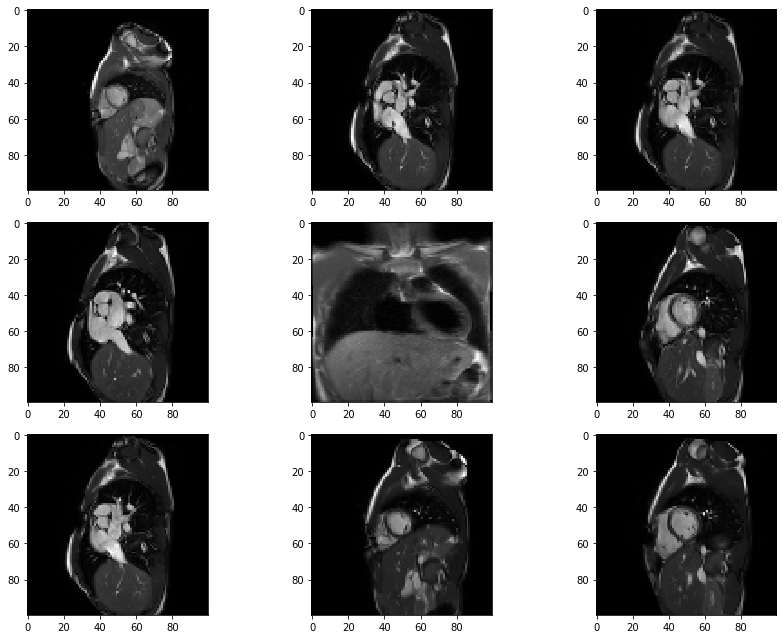

In [7]:
#showing image preview
chestrepo = originalrepo[np.asarray(target) == 'Cardiac']
symbols_visualise = random.sample(range(len(chestrepo)), 9)
fig,axes = plt.subplots(3,3, figsize=[12,9])
fig.tight_layout() # add spacing between subplots
for i, dat in enumerate(axes.flatten()):
    if i<len(symbols_visualise): # This "if" is here to avoid that, if the user specifies more subplots than data, the program crashes due to lack of data to plot
        dat.imshow(np.asarray(chestrepo[symbols_visualise[i]]).reshape(100,100), 
                   cmap='gray', interpolation='nearest')
print('Cardiac Images')
plt.show()

Chest Xray Images


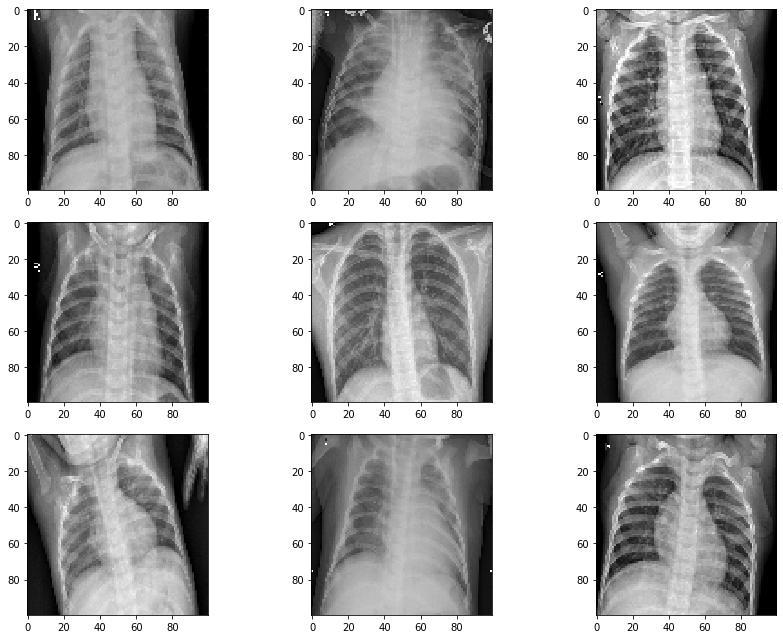

In [30]:
#showing image preview
kneerepo = originalrepo[np.asarray(target) == 'chest_xray']
symbols_visualise = random.sample(range(len(kneerepo)), 9)
fig,axes = plt.subplots(3,3, figsize=[12,9])
fig.tight_layout() # add spacing between subplots
for i, dat in enumerate(axes.flatten()):
    if i<len(symbols_visualise): # This "if" is here to avoid that, if the user specifies more subplots than data, the program crashes due to lack of data to plot
        dat.imshow(np.asarray(kneerepo[symbols_visualise[i]]).reshape(100,100), 
                   cmap='gray', interpolation='nearest')
print('Chest Xray Images')
plt.show()

fracture Images


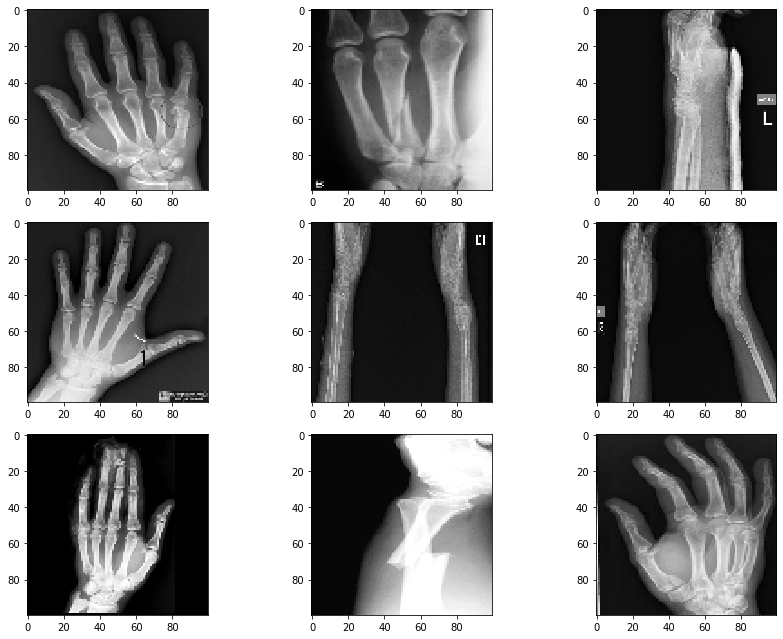

In [31]:
#showing image preview
handrepo = originalrepo[np.asarray(target) == 'fracture']
symbols_visualise = random.sample(range(len(handrepo)), 9)
fig,axes = plt.subplots(3,3, figsize=[12,9])
fig.tight_layout() # add spacing between subplots
for i, dat in enumerate(axes.flatten()):
    if i<len(symbols_visualise): # This "if" is here to avoid that, if the user specifies more subplots than data, the program crashes due to lack of data to plot
        dat.imshow(np.asarray(handrepo[symbols_visualise[i]]).reshape(100,100), 
                   cmap='gray', interpolation='nearest')
print('fracture Images')
plt.show()

In [9]:
originalrepo.shape

(1654, 10000)

## Dataset Compilation

The dataset consists of 1654 x-ray images, which were obtained from different sources:
* Cardiac: 516 images obtained from [Kaggle's CAD Cardiac MRI Dataset]
(https://www.kaggle.com/danialsharifrazi/cad-cardiac-mri-dataset). 

* chest_xray: 624 images obtained from [Chest X-Ray Images (Pneumonia)
(https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia). 

* fracture: 514 images obtained from [hand-fracture-mini-model)
https://www.kaggle.com/tommyngx/hand-fracture-mini-model

# PART 2

# 2a.

In [8]:
originalrepo = originalrepo.reshape(originalrepo.shape[0], 100,100)

In [9]:
#splitting the datasets into train and test
originaldata_train, originaldata_test, targetoriginaldata_train, targetoriginaldata_test = train_test_split(originalrepo, 
                                                                          target, test_size=0.3, 
                                                                          random_state=42, stratify=target)

hogdata_train, hogdata_test, targethogdata_train, targethogdata_test = train_test_split(hogrepo, 
                                                                          target, test_size=0.3, 
                                                                          random_state=42, stratify=target)



In [10]:
#converting to numpy array and normalising the dataset
targetoriginaldata_train = np.array(targetoriginaldata_train)
originaldata_train = np.array(originaldata_train) / 255.0
targetoriginaldata_test = np.array(targetoriginaldata_test)
originaldata_test = np.array(originaldata_test) / 255.0

In [11]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
targetoriginaldata_train = le.fit_transform(targetoriginaldata_train)
targetoriginaldata_test = le.fit_transform(targetoriginaldata_test)

# printing label
targetoriginaldata_train

array([1, 1, 2, ..., 1, 0, 0], dtype=int64)

In [12]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [17]:
#initialising cnn model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [20]:
history = model.fit(originaldata_train, targetoriginaldata_train, epochs=10)

Epoch 1/10
37/37 [==============================] - 7s 176ms/step - loss: 0.3418 - accuracy: 0.8678
Epoch 2/10
37/37 [==============================] - 7s 183ms/step - loss: 0.0675 - accuracy: 0.9784
Epoch 3/10
37/37 [==============================] - 7s 178ms/step - loss: 0.0287 - accuracy: 0.9896
Epoch 4/10
37/37 [==============================] - 7s 184ms/step - loss: 0.0183 - accuracy: 0.9939
Epoch 5/10
37/37 [==============================] - 7s 185ms/step - loss: 0.0122 - accuracy: 0.9965
Epoch 6/10
37/37 [==============================] - 7s 177ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 7/10
37/37 [==============================] - 7s 182ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 8/10
37/37 [==============================] - 7s 176ms/step - loss: 8.7760e-04 - accuracy: 1.0000
Epoch 9/10
37/37 [==============================] - 7s 182ms/step - loss: 5.0803e-04 - accuracy: 1.0000
Epoch 10/10
37/37 [==============================] - 7s 186ms/step - loss: 2.2586e-04 - accu

In [21]:
#evaluating the model
model.evaluate(originaldata_test, targetoriginaldata_test)

16/16 [==============================] - 1s 40ms/step - loss: 0.0226 - accuracy: 0.9940


[0.022553861141204834, 0.9939637780189514]

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
#making predictions using the model
p = model.predict(originaldata_test)
classes_p = [np.argmax(element) for element in p]
print("report: \n", classification_report(targetoriginaldata_test, classes_p))

report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       155
           1       1.00      1.00      1.00       188
           2       0.99      0.99      0.99       154

    accuracy                           0.99       497
   macro avg       0.99      0.99      0.99       497
weighted avg       0.99      0.99      0.99       497



In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### 2b. 

In [25]:
imagegen = ImageDataGenerator(
    rotation_range= 40,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [26]:
originaldata_train = originaldata_train.reshape(-1, 100, 100, 1)

In [27]:
originaldata_train.shape

(1157, 100, 100, 1)

In [28]:
imagegen.fit(originaldata_train)

In [32]:
Cardiac = os.path.join(path, "Cardiac")
chest_xray = os.path.join(path, "chest_xray")
fracture = os.path.join(path, "fracture")

In [35]:
Cardiac = len(os.listdir(Cardiac))
chest_xray = len(os.listdir(chest_xray))
fracture = len(os.listdir(fracture))

In [39]:
total = Cardiac + chest_xray + fracture
total

1660

In [42]:
weightcardiac = 1 / Cardiac * (total/3.0)
weightchest_xray = 1 / chest_xray * (total/3.0)
weightfracture = 1 / fracture * (total/3.0)
classweight = {"Cardiac": weightcardiac, "chest_xray": weightchest_xray, "fracture": weightfracture}

In [43]:
classweight

{'Cardiac': 1.0702772404900065,
 'chest_xray': 0.8853333333333334,
 'fracture': 1.0682110682110684}

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [45]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
history = model.fit(imagegen.flow(originaldata_train, targetoriginaldata_train), epochs=10)

Epoch 1/10
37/37 [==============================] - 7s 187ms/step - loss: 0.5535 - accuracy: 0.7891
Epoch 2/10
37/37 [==============================] - 7s 181ms/step - loss: 0.3205 - accuracy: 0.8781
Epoch 3/10
37/37 [==============================] - 7s 184ms/step - loss: 0.2535 - accuracy: 0.9101
Epoch 4/10
37/37 [==============================] - 7s 184ms/step - loss: 0.2175 - accuracy: 0.9239
Epoch 5/10
37/37 [==============================] - 7s 180ms/step - loss: 0.1720 - accuracy: 0.9352
Epoch 6/10
37/37 [==============================] - 7s 186ms/step - loss: 0.1494 - accuracy: 0.9464
Epoch 7/10
37/37 [==============================] - 7s 181ms/step - loss: 0.1811 - accuracy: 0.9369
Epoch 8/10
37/37 [==============================] - 7s 195ms/step - loss: 0.2185 - accuracy: 0.9231
Epoch 9/10
37/37 [==============================] - 7s 198ms/step - loss: 0.1617 - accuracy: 0.9378
Epoch 10/10
37/37 [==============================] - 7s 192ms/step - loss: 0.1040 - accuracy: 0.9611

In [48]:
model.evaluate(originaldata_test, targetoriginaldata_test)

16/16 [==============================] - 1s 40ms/step - loss: 0.0736 - accuracy: 0.9718


[0.07359009236097336, 0.9718309640884399]

In [49]:
p = model.predict(originaldata_test)
classes_p = [np.argmax(element) for element in p]
print("report: \n", classification_report(targetoriginaldata_test, classes_p))

report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       155
           1       0.96      1.00      0.98       188
           2       0.99      0.92      0.95       154

    accuracy                           0.97       497
   macro avg       0.97      0.97      0.97       497
weighted avg       0.97      0.97      0.97       497



## 2c. 

In [64]:
from sklearn.svm import SVC

In [65]:
#initialising the svm classifier
svc = SVC(kernel="linear")

In [66]:
#fitting the data with train data
svc.fit(hogdata_train, targethogdata_train)

SVC(kernel='linear')

In [67]:
#predicting with the classifier
p2c = svc.predict(hogdata_test)

In [68]:
#showing the classification report of the model
report = classification_report(targethogdata_test, p2c)

In [70]:
#confusion_matrix
cm = confusion_matrix(targethogdata_test, p2c)
print(cm)


[[154   0   1]
 [  0 188   0]
 [  1   1 152]]


In [ ]:
print(report)

### 2d. 

In [56]:
!pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Anaconda\\Lib\\site-packages\\~klearn\\linear_model\\_cd_fast.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [59]:
#from imblearn.over_sampling import RandomOverSampler

In [60]:
#from sklearn.metrics import confusion_matrix, classification_report

In [14]:
########################## 1. CALCULATE NEW DATASET USING RANDOM OVERSAMPLING (ROS) ##########################

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
hogrepo_ros, target_ros = ros.fit_resample(hogdata_train,targethogdata_train)


In [ ]:
svc2d = SVC(kernel="linear")
svc2d.fit(hogrepo_ros, target_ros)
p2d = svc2d.predict(hogdata_test)
#confusion_matrix
cm = confusion_matrix(targethogdata_test, p2d)
report2d = classification_report(targethogdata_test, p2d)

In [ ]:
print(cm)

In [ ]:
print(report2d)

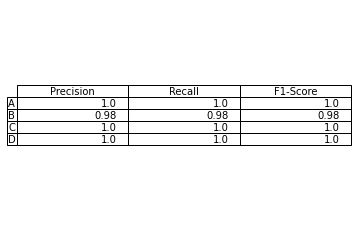

In [18]:
#plotting all average weighted of abcd into a table
import pandas as pd
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,1)
data=[[1,1,1],
      [0.98,0.98,0.98],
      [1,1,1],
      [1,1,1]]
column_labels=["Precision", "Recall", "F1-Score"]
df=pd.DataFrame(data,columns=column_labels)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["A","B","C","D"],loc="center")

plt.show()